# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Alunos:** Carlos Henrique Brito Malta Leão | Vinícius Alves de Faria Resende
### **Matrículas:** 2021039794 | 2021039972

### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [1]:
# Bibliotecas usadas no projeto
import pandas as pd
import matplotlib.pyplot as plt

# Importa a biblioteca mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

##**2. Data understanding (Entendimento dos dados)**


In [2]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';')

: 

Não presentes ou eliminados ciências da natureza: 290142 | 29.01%
Não presentes ou eliminados ciências humanas: 251776 | 25.18%
Não presentes ou eliminados linguagens e códigos: 251776 | 25.18%
Não presentes ou eliminados matemática: 290142 | 29.01%
Não presentes ou eliminados em todas as provas: 249555 | 24.96%
Não presentes ou eliminados em pelo menos uma prova: 292363 | 29.24%


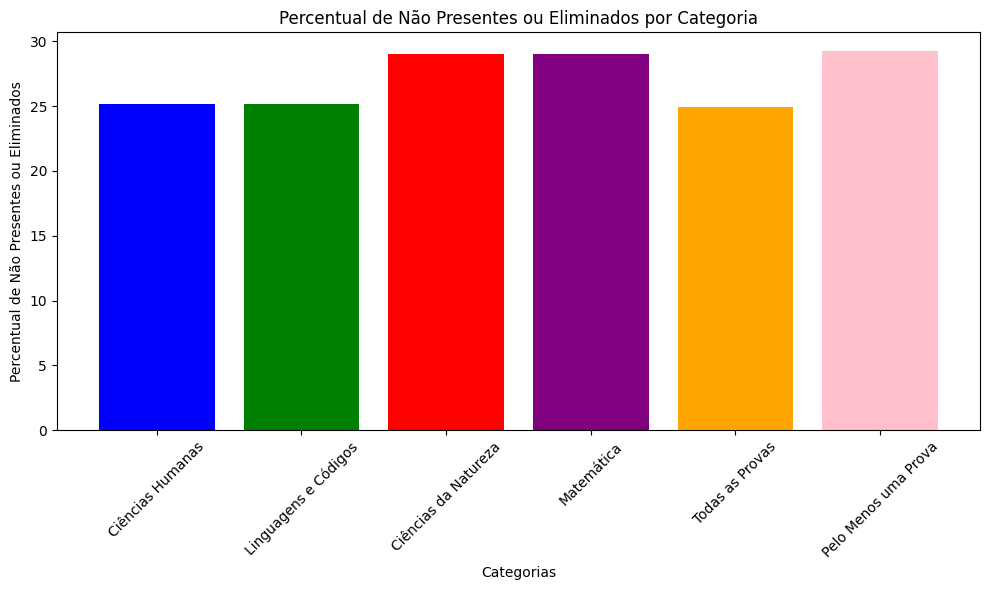

In [ ]:
# Verifica a não presença ou eliminação de participantes
mask_cn = (raw_df['TP_PRESENCA_CN'] == 2) | (raw_df['TP_PRESENCA_CN'] == 0)
mask_ch = (raw_df['TP_PRESENCA_CH'] == 2) | (raw_df['TP_PRESENCA_CH'] == 0)
mask_lc = (raw_df['TP_PRESENCA_LC'] == 2) | (raw_df['TP_PRESENCA_LC'] == 0)
mask_mt = (raw_df['TP_PRESENCA_MT'] == 2) | (raw_df['TP_PRESENCA_MT'] == 0)

mask_combined_and = mask_cn & mask_ch & mask_lc & mask_mt
mask_combined_or = mask_cn | mask_ch | mask_lc | mask_mt

count_cn = mask_cn.sum()
count_ch = mask_ch.sum()
count_lc = mask_lc.sum()
count_mt = mask_mt.sum()

count_combined_and = mask_combined_and.sum()
count_combined_or = mask_combined_or.sum()

total_of_participants = len(raw_df)

def get_percentage(count):
  return (count / total_of_participants) * 100


print("Não presentes ou eliminados ciências da natureza: " + str(count_cn) + " | " + str(round(get_percentage(count_cn), 2)) + "%")
print("Não presentes ou eliminados ciências humanas: " + str(count_ch) + " | " + str(round(get_percentage(count_ch), 2)) + "%")
print("Não presentes ou eliminados linguagens e códigos: " + str(count_lc) + " | " + str(round(get_percentage(count_lc), 2)) + "%")
print("Não presentes ou eliminados matemática: " + str(count_mt) + " | " + str(round(get_percentage(count_mt), 2)) + "%")
print("Não presentes ou eliminados em todas as provas: " + str(count_combined_and) + " | " + str(round(get_percentage(count_combined_and), 2)) + "%")
print("Não presentes ou eliminados em pelo menos uma prova: " + str(count_combined_or) + " | " + str(round(get_percentage(count_combined_or), 2)) + "%")

# Números Absolutos

categories = ['Ciências Humanas', 'Linguagens e Códigos', 'Ciências da Natureza', 'Matemática', 'Todas as Provas', 'Pelo Menos uma Prova']
counts_absolute = [count_ch, count_lc, count_cn, count_mt, count_combined_and, count_combined_or]

# Números Percentuais 
counts_percentile = [get_percentage(item) for item in counts_absolute]

# Plote um gráfico de barras para mostrar as porcentagens
plt.figure(figsize=(10, 6))
plt.bar(categories, counts_percentile, color=['blue', 'green', 'red', 'purple', 'orange', 'pink'])
plt.xlabel('Categorias')
plt.ylabel('Percentual de Não Presentes ou Eliminados')
plt.title('Percentual de Não Presentes ou Eliminados por Categoria')
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()


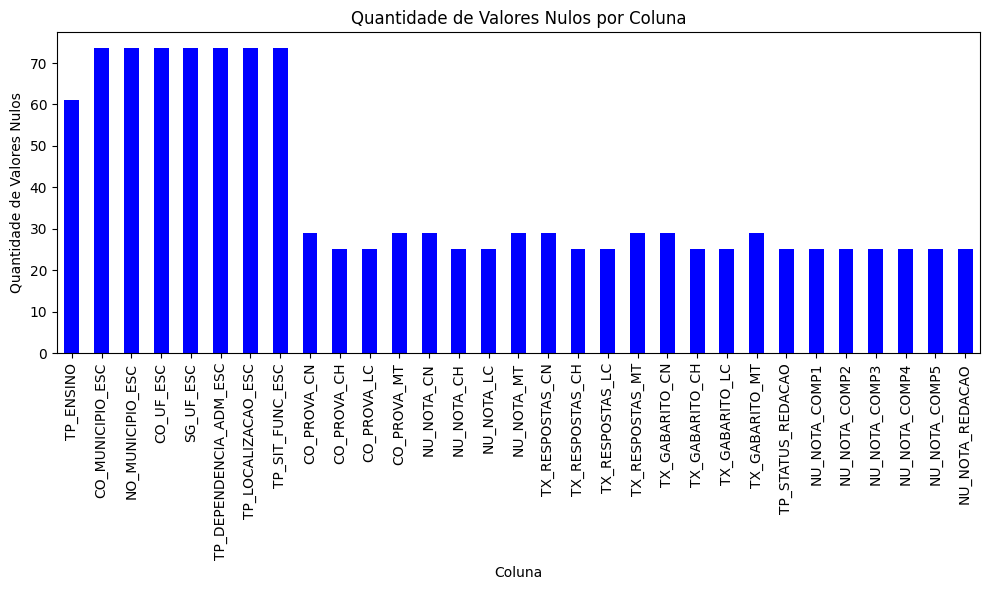

In [ ]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = raw_df.isnull().sum().apply(get_percentage)
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

TP_COR_RACA
Não Declarado     1.8301
Branca           36.6235
Preta            12.9536
Parda            46.0462
Amarela           1.9471
Indígena          0.5995
Name: count, dtype: float64


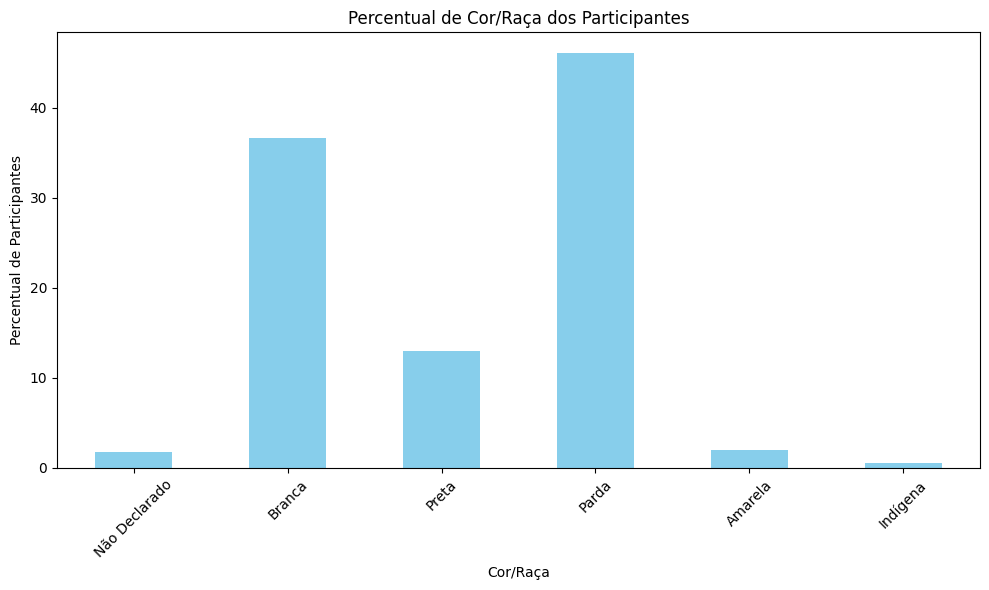

In [ ]:
# Calcular a frequência de cor/raça dos participantes
cor_raca_dict = {
    0: 'Não Declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena'
}
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts().sort_index().apply(get_percentage)
cor_raca_counts.index = cor_raca_counts.index.map(cor_raca_dict)

print(cor_raca_counts)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
cor_raca_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Cor/Raça')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Cor/Raça dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TP_SEXO
F    67.1236
M    32.8764
Name: count, dtype: float64


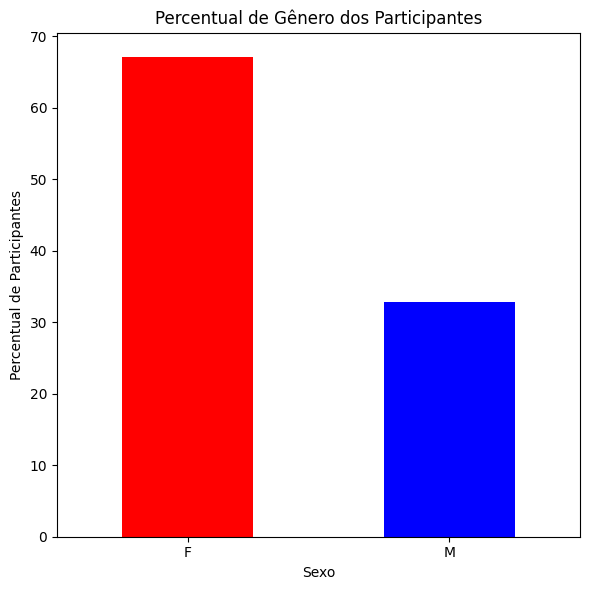

In [ ]:
sexo_counts = raw_df['TP_SEXO'].value_counts().apply(get_percentage)
print(sexo_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
sexo_counts.plot(kind='bar', color=['red', 'blue'])
plt.xlabel('Sexo')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual de Gênero dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

TP_ESCOLA
Não Respondeu    59.6320
Pública          36.1348
Privada           4.2332
Name: count, dtype: float64


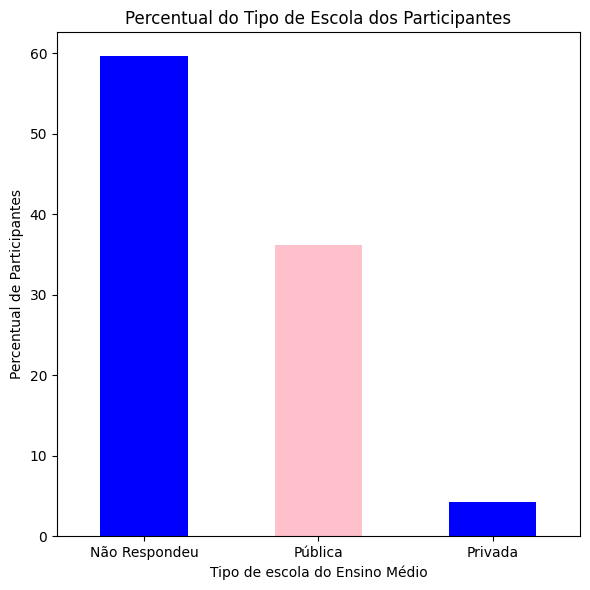

In [ ]:
escola_dict = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada',
}

escola_counts = raw_df['TP_ESCOLA'].value_counts().sort_index().apply(get_percentage)
escola_counts.index = escola_counts.index.map(escola_dict)
print(escola_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
escola_counts.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Tipo de escola do Ensino Médio')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual do Tipo de Escola dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q010
Não                    59.7347
Sim, um                33.3146
Sim, dois               6.0779
Sim, três               0.7149
Sim, quatro ou mais     0.1579
Name: count, dtype: float64


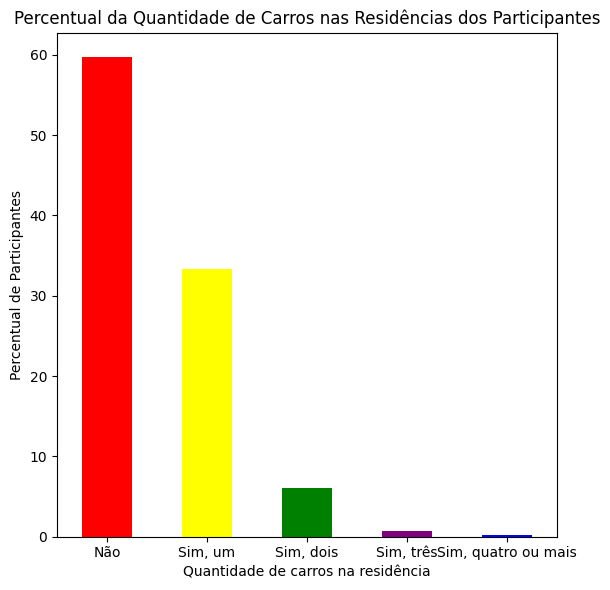

In [ ]:
carro_dict = {
    'A': 'Não',
    'B': 'Sim, um',
    'C': 'Sim, dois',
    'D': 'Sim, três',
    'E': 'Sim, quatro ou mais',
}

carro_counts = raw_df['Q010'].value_counts().sort_index().apply(get_percentage)
carro_counts.index = carro_counts.index.map(carro_dict)
print(carro_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
carro_counts.plot(kind='bar', color=['red', 'yellow', 'green', 'purple', 'blue'])
plt.xlabel('Quantidade de carros na residência')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Quantidade de Carros nas Residências dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Q025
Não    11.1958
Sim    88.8042
Name: count, dtype: float64


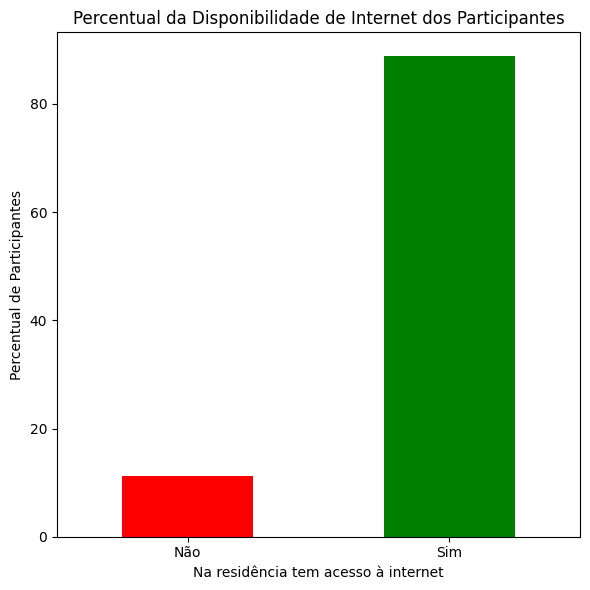

In [ ]:
internet_dict = {
    'A': 'Não',
    'B': 'Sim',
}

internet_counts = raw_df['Q025'].value_counts().sort_index().apply(get_percentage)
internet_counts.index = internet_counts.index.map(internet_dict)
print(internet_counts)

# Criar o gráfico de barras
plt.figure(figsize=(6, 6))
internet_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Na residência tem acesso à internet')
plt.ylabel('Percentual de Participantes')
plt.title('Percentual da Disponibilidade de Internet dos Participantes')

# Exibir o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##**3. Data preparation (Preparação dos dados)**

In [ ]:
# Dada as colunas de interesse, selecionamos apenas as colunas que serão usadas no projeto
columns_of_interest = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC','TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025']

DF = raw_df.filter(columns_of_interest)

del raw_df

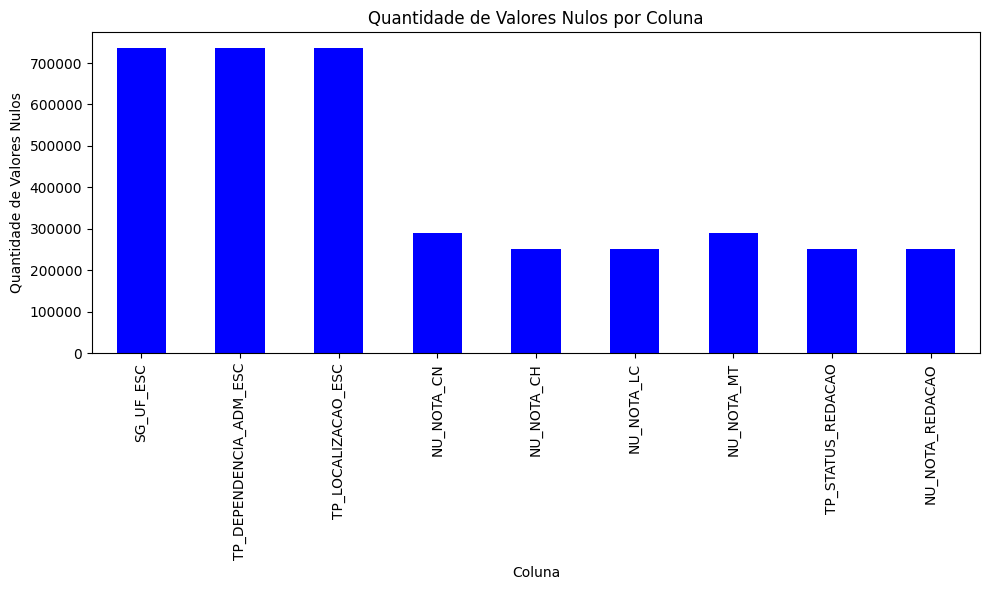

In [ ]:
# Exibe a quantidade de valores nulos de cada coluna
null_counts = DF.isnull().sum()
null_counts = null_counts[null_counts > 0]

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
null_counts.plot(kind='bar', color='blue')
plt.xlabel('Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.title('Quantidade de Valores Nulos por Coluna')

# Exibir o gráfico
plt.tight_layout()
plt.show()

# Dadas algumas colunas com muitos valores nulos, removeremos estas para evitar enviesamentos (bias)
columns_to_remove = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']
DF.drop(columns=columns_to_remove, inplace=True)

In [ ]:
# Adiciona uma coluna com a média das notas de cada participante
DF['NU_NOTA_MEDIA'] = (DF['NU_NOTA_CN'] + DF['NU_NOTA_CH'] + DF['NU_NOTA_LC'] + DF['NU_NOTA_MT'] + DF['NU_NOTA_REDACAO']) / 5

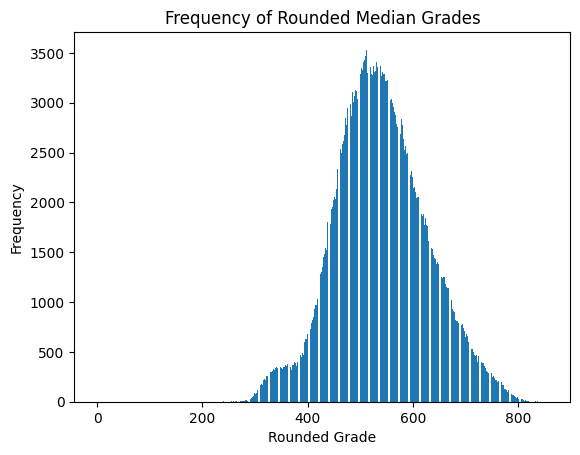

In [ ]:
# Exibe a distribuição das notas médias
filtered_df = DF[DF['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

In [ ]:
# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

Nota de corte do top 1%: 751.0
Nota de corte do top 25%: 596.0
Nota de corte do top 50%: 535.0
Nota de corte do top 75%: 481.0
Nota de corte do top 100%: 80.0


In [ ]:
# Adiciona uma coluna com o valor categórico de acordo com a nota média

# A -> 1%
# B -> 2% - 25%
# C -> 26% - 50%
# D -> 51% - 75%
# E -> 76% - 100%

def map_num_grade_to_categorical(grade):
  if grade >= top_1_percent_grade:
    return 'A'
  elif grade >= top_25_percent_grade:
    return 'B'
  elif grade >= top_50_percent_grade:
    return 'C'
  elif grade >= top_75_percent_grade:
    return 'D'
  elif grade >= lowest_valid_grade:
    return 'E'
  else:
    return 'F'

DF['TP_NOTA_MEDIA'] = DF['NU_NOTA_MEDIA'].round().apply(map_num_grade_to_categorical)


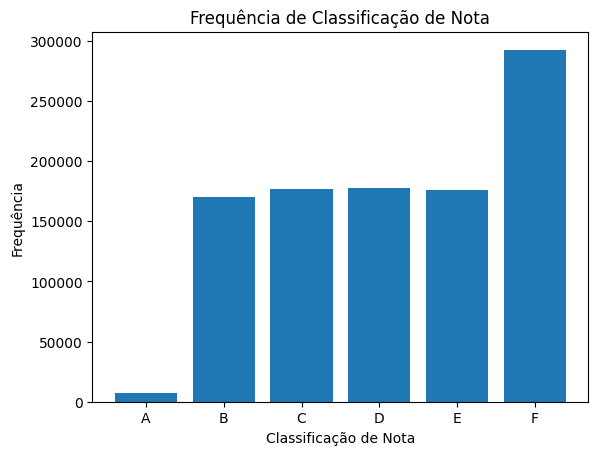

In [ ]:
# Exibe a distribuição das classificações de notas
grade_counts = DF['TP_NOTA_MEDIA'].value_counts().sort_index()

plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Classificação de Nota')
plt.ylabel('Frequência')
plt.title('Frequência de Classificação de Nota')

plt.show()

In [ ]:
# Remover atributos de nota para deixar apenas a nota média na base de dados

columns_to_remove = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'NU_NOTA_MEDIA',  ]
DF.drop(columns=columns_to_remove, inplace=True)


In [ ]:
# Remover questões do formulário socioeconômico menos relevantes

columns_to_remove = ['Q007', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024']
DF.drop(columns=columns_to_remove, inplace=True)

In [ ]:
columns_to_remove = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
DF.drop(columns=columns_to_remove, inplace=True)

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q008',
       'Q009', 'Q010', 'Q025', 'TP_NOTA_MEDIA'],
      dtype='object')


Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ESCOLA', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q008',
       'Q009', 'Q010', 'Q025', 'TP_NOTA_MEDIA'],
      dtype='object')

##**4. Modeling (Modelagem)**


1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [ ]:
# Definir valores de todas as colunas

def addInitials(DF):
  for col in DF.columns:
    if (len(col) > 4):
      initials = ''.join([word[0] for word in col.split('_')])
      DF[col] = DF[col].apply(lambda x: f'{initials}:{x}')
    else:
      DF[col] = DF[col].apply(lambda x: f'{col}:{x}')
  return DF

In [ ]:
def DF_to_matrix(DF):
    lines = []
    for _index, row in DF.iterrows():
        # Converter a linha em um array usando tolist()
        line = row.tolist()
        # Adicionar o array à lista de arrays
        lines.append(line)
    return lines


In [ ]:
def create_transaction_df(DF_matrix):
  indexes = range(0, len(DF_matrix))
  transaction_encoder = TransactionEncoder()
  transaction_array = transaction_encoder.fit(DF_matrix).transform(DF_matrix)
  transaction_dataframe = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_, index=indexes)
  return transaction_dataframe

In [ ]:
# Aplicamos o algoritmo FP-Growth para encontrar conjuntos frequentes
def find_frequent_itemsets(transaction_dataframe):
  frequent_itemsets = fpgrowth(transaction_dataframe, min_support=0.2, use_colnames=True)
  return frequent_itemsets

In [ ]:
df = addInitials(DF)
df_matrix = DF_to_matrix(df)
transaction_df = create_transaction_df(df_matrix)
frequent_itemsets = find_frequent_itemsets(transaction_df)  

In [ ]:
for index, row in frequent_itemsets.iterrows():
    itemset = row['itemsets']
    support = row['support']
    if any(item.startswith('TNM') for item in itemset):
        print(f"Conjunto Frequent: {itemset}, Suporte: {support}")

print(frequent_itemsets)


Conjunto Frequent: frozenset({'TNM:TNM:F'}), Suporte: 0.292366
Conjunto Frequent: frozenset({'TNM:TNM:F', 'Q008:Q008:B'}), Suporte: 0.232026
Conjunto Frequent: frozenset({'TE:TE:1', 'TNM:TNM:F'}), Suporte: 0.208386
Conjunto Frequent: frozenset({'TNM:TNM:F', 'Q025:Q025:B'}), Suporte: 0.251608
Conjunto Frequent: frozenset({'TNM:TNM:F', 'Q010:Q010:A'}), Suporte: 0.20079
Conjunto Frequent: frozenset({'TNM:TNM:F', 'TEC:TEC:1'}), Suporte: 0.249187
Conjunto Frequent: frozenset({'TNM:TNM:F', 'TEC:TEC:1', 'Q025:Q025:B'}), Suporte: 0.214377
      support                                    itemsets
0    0.716531                               (Q008:Q008:B)
1    0.596320                                   (TE:TE:1)
2    0.454921                               (Q004:Q004:B)
3    0.363430                               (Q006:Q006:B)
4    0.333146                               (Q010:Q010:B)
..        ...                                         ...
270  0.214354             (TE:TE:2, Q025:Q025:B, TS:TS:F)

In [ ]:
for frequent_itemset in frequent_itemsets_by_grade[0]:
  print(frequent_itemset)

print(frequent_itemsets_by_grade[0])

support
itemsets
      support                                      itemsets
0    1.000000                                       (TPM:1)
1    1.000000                                       (TPL:1)
2    1.000000                                       (TPC:1)
3    0.995372                                      (Q025:B)
4    0.967853                                       (TEC:1)
..        ...                                           ...
170  0.518850          (TPL:1, TPM:1, TEC:1, TPC:1, Q009:D)
171  0.518303         (TPL:1, TPM:1, TEC:1, Q025:B, Q009:D)
172  0.518303         (Q025:B, TPM:1, TEC:1, TPC:1, Q009:D)
173  0.518303         (Q025:B, TPL:1, TEC:1, TPC:1, Q009:D)
174  0.518303  (TPC:1, TPL:1, TPM:1, TEC:1, Q025:B, Q009:D)

[175 rows x 2 columns]


##**5. Evaluation (Validação)**


In [ ]:
for idx, frequent_itemsets in enumerate(frequent_itemsets_by_grade):
    print(f"Avaliação do Modelo para a nota {chr(ord('A') + idx)}:")
    
    # Suponha que você tenha um conjunto de regras de associação geradas a partir dos frequent_itemsets
    # Utilize a biblioteca mlxtend para calcular métricas de associação
    from mlxtend.frequent_patterns import association_rules
    
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
    
    # Exemplo de métricas calculadas
    print(f"Total de regras geradas: {len(rules)}")
    print(f"Regras de alta confiança:")
    high_confidence_rules = rules[rules['confidence'] > 0.8]
    print(high_confidence_rules)
    
    print("\n")

Avaliação do Modelo para a nota A:
Total de regras geradas: 1674
Regras de alta confiança:
           antecedents                           consequents  \
0              (TPL:1)                               (TPM:1)   
1              (TPM:1)                               (TPL:1)   
2              (TPL:1)                               (TPC:1)   
3              (TPC:1)                               (TPL:1)   
4              (TPC:1)                               (TPM:1)   
...                ...                                   ...   
1661   (TPL:1, Q009:D)         (Q025:B, TPC:1, TPM:1, TEC:1)   
1664   (TPM:1, Q009:D)         (TPL:1, TPC:1, Q025:B, TEC:1)   
1666   (Q009:D, TEC:1)         (Q025:B, TPL:1, TPC:1, TPM:1)   
1667  (Q025:B, Q009:D)          (TPL:1, TPC:1, TPM:1, TEC:1)   
1673          (Q009:D)  (TPC:1, TPL:1, TPM:1, TEC:1, Q025:B)   

      antecedent support  consequent support   support  confidence      lift  \
0               1.000000            1.000000  1.000000    1.

**Prevenção de falhas**
(Opcional)


Se o seu dataset for muito grande ou muito grande, ou for muito custoso rodar os algoritmos é indicado que tenha uma célula na qual os resultados parciais possam ser salvos. Evitando, assim ter que re-rodar os algoritmos novamente.